# **Waze Project**
**Course 5 - Regression analysis: Simplify complex data relationships**

Your team is more than halfway through their user churn project. Earlier, you completed a project proposal, used Python to explore and analyze Waze’s user data, created data visualizations, and conducted a hypothesis test. Now, leadership wants your team to build a regression model to predict user churn based on a variety of variables.

You check your inbox and discover a new email from Ursula Sayo, Waze's Operations Manager. Ursula asks your team about the details of the regression model. You also notice two follow-up emails from your supervisor, May Santner. The first email is a response to Ursula, and says that the team will build a binomial logistic regression model. In her second email, May asks you to help build the model and prepare an executive summary to share your results.

A notebook was structured and prepared to help you in this project. Please complete the following questions and prepare an executive summary.

# **Course 5 End-of-course project: Regression modeling**

In this activity, you will build a binomial logistic regression model. As you have learned, logistic regression helps you estimate the probability of an outcome. For data science professionals, this is a useful skill because it allows you to consider more than one variable against the variable you're measuring against. This opens the door for much more thorough and flexible analysis to be completed.
<br/>

**The purpose** of this project is to demostrate knowledge of exploratory data analysis (EDA) and a binomial logistic regression model.

**The goal** is to build a binomial logistic regression model and evaluate the model's performance.
<br/>

*This activity has three parts:*

**Part 1:** EDA & Checking Model Assumptions
* What are some purposes of EDA before constructing a binomial logistic regression model?

**Part 2:** Model Building and Evaluation
* What resources do you find yourself using as you complete this stage?

**Part 3:** Interpreting Model Results

* What key insights emerged from your model(s)?

* What business recommendations do you propose based on the models built?

<br/>

Follow the instructions and answer the question below to complete the activity. Then, you will complete an executive summary using the questions listed on the PACE Strategy Document.

Be sure to complete this activity before moving on. The next course item will provide you with a completed exemplar to compare to your own work.

# **Build a regression model**

<img src="images/Pace.png" width="100" height="100" align=left>

# **PACE stages**


Throughout these project notebooks, you'll see references to the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.

<img src="images/Plan.png" width="100" height="100" align=left>


## **PACE: Plan**
Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

### **Task 1. Imports and data loading**
Import the data and packages that you've learned are needed for building logistic regression models.

In [2]:
# Packages for numerics + dataframes
# Standard operational package imports.
import numpy as np
import pandas as pd

# Packages for visualization
# Visualization package imports.
import matplotlib.pyplot as plt
import seaborn as sns


# Packages for Logistic Regression & Confusion Matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Important imports for preprocessing, modeling, and evaluation.
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc



Import the dataset.

**Note:** As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [4]:
# Load the dataset by running this cell

df = pd.read_csv('waze_dataset.csv')

<img src="images/Analyze.png" width="100" height="100" align=left>

## **PACE: Analyze**

Consider the questions in your PACE Strategy Document to reflect on the Analyze stage.

In this stage, consider the following question:

* What are some purposes of EDA before constructing a binomial logistic regression model?

Propósitos del EDA (Análisis Exploratorio de Datos) antes de construir un modelo de regresión logística binomial:

El EDA es crucial para garantizar que los datos cumplan con los supuestos del modelo y para mejorar su rendimiento. Aquí los principales objetivos:

1. Comprender la distribución de la variable objetivo
Propósito: Evaluar el balance de clases (proporción de casos positivos vs. negativos).

Relevancia para el modelo:

Si hay desbalance extremo (ej: 95% de una clase), el modelo podría sesgarse hacia la clase mayoritaria.

Soluciones: Oversampling, undersampling, o ajustar pesos en el modelo.

2. Identificar y manejar datos faltantes
Propósito: Detectar variables con missing values y decidir estrategias (eliminación, imputación).

Relevancia para el modelo:

La regresión logística no maneja missing values automáticamente; se requiere preprocesamiento.

Ejemplo: Si el 30% de una variable clave tiene datos faltantes, imputar con la mediana/moda podría ser necesario.

3. Detectar outliers en predictores
Propósito: Identificar valores extremos en variables numéricas.

Relevancia para el modelo:

Los outliers pueden distorsionar los coeficientes del modelo (especialmente en variables no normalizadas).

Soluciones: Transformaciones (log, winsorización) o eliminación.

4. Evaluar colinealidad entre predictores
Propósito: Identificar correlaciones altas entre variables independientes.

Relevancia para el modelo:

La colinealidad infla los errores estándar de los coeficientes, haciéndolos inestables.

Métodos: Matriz de correlación, Variance Inflation Factor (VIF).

Ejemplo: Si dos variables tienen una correlación de 0.9, se podría eliminar una o usar técnicas de reducción de dimensionalidad.

5. Validar la relación lineal entre predictores y el logit
Propósito: Verificar que la relación entre predictores continuos y el logit (logaritmo de la razón de probabilidades) sea lineal.

Relevancia para el modelo:

La regresión logística asume linealidad en el logit. Si no se cumple, el modelo tendrá sesgo.

Métodos:

Gráficos de Box-Tidwell (transformar predictores con 
X
⋅
ln
⁡
(
X
)
X⋅ln(X)).

Uso de splines o transformaciones no lineales (ej: cuadráticas).

6. Explorar relaciones entre predictores y la variable objetivo
Propósito: Identificar predictores relevantes y su dirección de asociación.

Relevancia para el modelo:

Variables sin relación con el objetivo pueden ser ruido y reducir la generalización.

Métodos:

Tablas de contingencia para variables categóricas.

Gráficos de caja (boxplots) para variables numéricas vs. clases.

Pruebas estadísticas (chi-cuadrado, t-test).

7. Preparar variables categóricas
Propósito: Analizar niveles de variables categóricas y su distribución.

Relevancia para el modelo:

Variables con muchas categorías o niveles poco frecuentes pueden generar sobreajuste.

Soluciones: Agrupar categorías raras o usar codificación one-hot.

8. Identificar interacciones entre variables
Propósito: Descubrir combinaciones de variables que afecten conjuntamente al resultado.

Relevancia para el modelo:

Interacciones no consideradas pueden llevar a omitir patrones clave.

Métodos: Gráficos de dispersión estratificados o análisis de efectos marginales.

### **Task 2a. Explore data with EDA**

Analyze and discover data, looking for correlations, missing data, potential outliers, and/or duplicates.



Start with `.shape` and `info()`.

In [6]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB


**Question:** Are there any missing values in your data?

Si, solo en en la columna Label tenemos 14.999 - 14.299 = 700 datos faltantes.

Use `.head()`.



In [7]:
df.head()

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android


Use `.drop()` to remove the ID column since we don't need this information for your analysis.

In [8]:
df = df.drop(columns=['ID'])


Now, check the class balance of the dependent (target) variable, `label`.

In [12]:
print(df["label"].value_counts())
print(df["label"].value_counts(normalize=True) * 100)


retained    11763
churned      2536
Name: label, dtype: int64
retained    82.264494
churned     17.735506
Name: label, dtype: float64


Call `.describe()` on the data.


In [11]:
df.describe()

,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,80.633776,67.281152,189.964447,1749.837789,121.605974,29.672512,4039.340921,1860.976012,15.537102,12.179879
std,80.699065,65.913872,136.405128,1008.513876,148.121544,45.394651,2502.149334,1446.702288,9.004655,7.824036
min,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000
25%,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000
50%,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000
75%,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000
max,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000


**Question:** Are there any variables that could potentially have outliers just by assessing at the quartile values, standard deviation, and max values?

### 📌 **Análisis de valores atípicos basado en cuartiles, desviación estándar y valores máximos**  

Al observar las métricas estadísticas en las imágenes (`describe()`), podemos detectar **posibles valores atípicos (outliers)** en algunas variables.  

---

### 🔍 **Criterios para identificar valores atípicos**  
1️⃣ **Comparación entre cuartiles (`25%`, `50%`, `75%`) y valores máximos (`max`)**  
   - Si el valor máximo es **muy superior al `75%` (Q3)**, es posible que haya outliers.  

2️⃣ **Desviación estándar (`std`) alta en comparación con la media (`mean`)**  
   - Si la desviación estándar es **similar o mayor a la media**, la variable tiene alta dispersión y puede haber valores extremos.  

---

### 🔹 **Variables con posibles valores atípicos**  

| **Variable**                     | **Posibles valores atípicos** | **Razón** |
|----------------------------------|-----------------------------|-----------|
| `sessions`                      | ✅ Sí  | `max = 743`, mientras que `75% = 112` (mucho más alto). |
| `drives`                        | ✅ Sí  | `max = 596`, mientras que `75% = 93`. |
| `total_sessions`                | ✅ Sí  | `max = 1216`, mientras que `75% = 254`. |
| `n_days_after_onboarding`       | ✅ Sí  | `max = 3500`, mientras que `75% = 2623`. |
| `total_navigations_fav1`        | ✅ Sí  | `max = 1236`, mientras que `75% = 178`. |
| `driven_km_drives`              | ✅ Sí  | `max = 21183`, mientras que `75% = 5289`. |
| `duration_minutes_drives`       | ✅ Sí  | `max = 15851`, mientras que `75% = 2464`. |

---

### 🔍 **¿Qué hacer con estos valores atípicos?**  
1️⃣ **Visualizar los outliers** con boxplots:  
   ```python
   import seaborn as sns
   import matplotlib.pyplot as plt

   variables = ["sessions", "drives", "total_sessions", "driven_km_drives", "duration_minutes_drives"]
   plt.figure(figsize=(12,6))
   sns.boxplot(data=df[variables])
   plt.xticks(rotation=45)
   plt.show()
   ```
   
2️⃣ **Aplicar reglas para detectar valores atípicos**  
   - Usar el **IQR (Interquartile Range)**:  
     ```python
     Q1 = df["sessions"].quantile(0.25)
     Q3 = df["sessions"].quantile(0.75)
     IQR = Q3 - Q1
     lower_bound = Q1 - 1.5 * IQR
     upper_bound = Q3 + 1.5 * IQR
     outliers = df[(df["sessions"] < lower_bound) | (df["sessions"] > upper_bound)]
     print(outliers)
     ```

3️⃣ **Decidir si se eliminan o transforman**  
   - **Eliminar outliers extremos** si afectan el análisis.  
   - **Aplicar transformaciones** como `log()` o `sqrt()` para reducir el impacto de valores extremos.  

---

### ✅ **Conclusión**  
✔ **Varias variables tienen valores máximos muy superiores al `75%`**, lo que indica posibles outliers.  
✔ **Las variables con mayor dispersión (`std` alta comparada con la media) también podrían contener valores extremos.**  
✔ **Se recomienda analizar visualmente los datos con boxplots y decidir si eliminar, transformar o mantener los outliers según su impacto en el modelo.**  

### **Task 2b. Create features**

Create features that may be of interest to the stakeholder and/or that are needed to address the business scenario/problem.

#### **`km_per_driving_day`**

You know from earlier EDA that churn rate correlates with distance driven per driving day in the last month. It might be helpful to engineer a feature that captures this information.

1. Create a new column in `df` called `km_per_driving_day`, which represents the mean distance driven per driving day for each user.

2. Call the `describe()` method on the new column.

In [13]:
# 1. Create `km_per_driving_day` column
df["km_per_driving_day"] = df["driven_km_drives"] / df["driving_days"]

# 2. Call `describe()` on the new column
df.describe()

,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_per_driving_day
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,1.499900e+04
mean,80.633776,67.281152,189.964447,1749.837789,121.605974,29.672512,4039.340921,1860.976012,15.537102,12.179879,inf
std,80.699065,65.913872,136.405128,1008.513876,148.121544,45.394651,2502.149334,1446.702288,9.004655,7.824036,NaN
min,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000,3.022063e+00
25%,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000,1.672804e+02
50%,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000,3.231459e+02
75%,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000,7.579257e+02
max,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000,inf


Note that some values are infinite. This is the result of there being values of zero in the `driving_days` column. Pandas imputes a value of infinity in the corresponding rows of the new column because division by zero is undefined.

1. Convert these values from infinity to zero. You can use `np.inf` to refer to a value of infinity.

2. Call `describe()` on the `km_per_driving_day` column to verify that it worked.

In [14]:
# 1. Convert infinite values to zero
df.replace([np.inf, -np.inf], 0, inplace=True)

# 2. Confirm that it worked
df.describe()

,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_per_driving_day
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,80.633776,67.281152,189.964447,1749.837789,121.605974,29.672512,4039.340921,1860.976012,15.537102,12.179879,578.963113
std,80.699065,65.913872,136.405128,1008.513876,148.121544,45.394651,2502.149334,1446.702288,9.004655,7.824036,1030.094384
min,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000,0.000000
25%,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000,136.238895
50%,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000,272.889272
75%,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000,558.686918
max,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000,15420.234110


#### **`professional_driver`**

Create a new, binary feature called `professional_driver` that is a 1 for users who had 60 or more drives <u>**and**</u> drove on 15+ days in the last month.

**Note:** The objective is to create a new feature that separates professional drivers from other drivers. In this scenario, domain knowledge and intuition are used to determine these deciding thresholds, but ultimately they are arbitrary.

To create this column, use the [`np.where()`](https://numpy.org/doc/stable/reference/generated/numpy.where.html) function. This function accepts as arguments:
1. A condition
2. What to return when the condition is true
3. What to return when the condition is false

```
Example:
x = [1, 2, 3]
x = np.where(x > 2, 100, 0)
x
array([  0,   0, 100])
```

In [15]:
# Create `professional_driver` column
df["professional_driver"] = np.where((df["drives"] >= 60) & (df["driving_days"] >= 15), 1, 0)

Perform a quick inspection of the new variable.

1. Check the count of professional drivers and non-professionals

2. Within each class (professional and non-professional) calculate the churn rate

In [19]:
# 1. Check count of professionals and non-professionals
print(df["professional_driver"].value_counts())


# 2. Check in-class churn rate
print(df["professional_driver"].value_counts(normalize=True)*100)


0    12405
1     2594
Name: professional_driver, dtype: int64
0    82.705514
1    17.294486
Name: professional_driver, dtype: float64


The churn rate for professional drivers is 7.6%, while the churn rate for non-professionals is 19.9%. This seems like it could add predictive signal to the model.

<img src="images/Construct.png" width="100" height="100" align=left>

## **PACE: Construct**

After analysis and deriving variables with close relationships, it is time to begin constructing the model.

Consider the questions in your PACE Strategy Document to reflect on the Construct stage.

In this stage, consider the following question:

* Why did you select the X variables you did?

📌 Selección de variables independientes (X) para una regresión logística binomial
Dado que la variable dependiente (y) es label, que indica si un usuario fue retained (1) o no (0), debemos elegir variables predictoras (X) que puedan influir en la retención del usuario.

🔹 Criterios para seleccionar variables independientes (X)
1️⃣ Deben ser numéricas o convertibles a numéricas (Regresión Logística no trabaja directamente con variables categóricas).
2️⃣ Deben ser relevantes y no redundantes (evitar colinealidad).
3️⃣ Deben potencialmente influir en la retención del usuario (basado en lógica de negocio y análisis exploratorio).

🔍 Posibles variables independientes (X)
✅ 1. Variables relacionadas con el uso de la plataforma
📌 Razón: Más sesiones y viajes pueden indicar mayor engagement, lo que podría predecir la retención.

sessions → Número de sesiones en la plataforma.
drives → Cantidad de viajes realizados.
total_sessions → Suma total de sesiones, puede capturar uso a largo plazo.
✅ 2. Variables de interacción con la plataforma
📌 Razón: Usuarios que usan más la navegación o pasan más tiempo en la app podrían tener mayor retención.

total_navigations_fav1 → Número de veces que navegan a sus destinos favoritos.
total_navigations_fav2 → Segundo conjunto de destinos favoritos.
driven_km_drives → Kilómetros conducidos, puede indicar engagement.
duration_minutes_drives → Minutos totales de conducción, podría correlacionarse con la retención.
✅ 3. Variables de actividad
📌 Razón: Usuarios más activos tienen más probabilidades de seguir usando la app.

activity_days → Días activos en la plataforma.
driving_days → Días en los que han conducido, más días pueden indicar mayor lealtad.


### **Task 3a. Preparing variables**

Call `info()` on the dataframe to check the data type of the `label` variable and to verify if there are any missing values.

In [20]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   label                    14299 non-null  object 
 1   sessions                 14999 non-null  int64  
 2   drives                   14999 non-null  int64  
 3   total_sessions           14999 non-null  float64
 4   n_days_after_onboarding  14999 non-null  int64  
 5   total_navigations_fav1   14999 non-null  int64  
 6   total_navigations_fav2   14999 non-null  int64  
 7   driven_km_drives         14999 non-null  float64
 8   duration_minutes_drives  14999 non-null  float64
 9   activity_days            14999 non-null  int64  
 10  driving_days             14999 non-null  int64  
 11  device                   14999 non-null  object 
 12  km_per_driving_day       14999 non-null  float64
 13  professional_driver      14999 non-null  int64  
dtypes: float64(4), int64(8

Because you know from previous EDA that there is no evidence of a non-random cause of the 700 missing values in the `label` column, and because these observations comprise less than 5% of the data, use the `dropna()` method to drop the rows that are missing this data.

In [21]:
# Drop rows with missing data in `label` column
df = df.dropna().reset_index(drop=True)

#### **Impute outliers**

You rarely want to drop outliers, and generally will not do so unless there is a clear reason for it (e.g., typographic errors).

At times outliers can be changed to the **median, mean, 95th percentile, etc.**

Previously, you determined that seven of the variables had clear signs of containing outliers:

* `sessions`
* `drives`
* `total_sessions`
* `total_navigations_fav1`
* `total_navigations_fav2`
* `driven_km_drives`
* `duration_minutes_drives`

For this analysis, impute the outlying values for these columns. Calculate the **95th percentile** of each column and change to this value any value in the column that exceeds it.


In [22]:
# Impute outliers
# Lista de columnas a tratar
columns_to_fix = [
    "sessions", "drives", "total_sessions", 
    "total_navigations_fav1", "total_navigations_fav2", 
    "driven_km_drives", "duration_minutes_drives"
]

# Calcular el percentil 95 de cada columna y reemplazar valores atípicos
for col in columns_to_fix:
    percentile_95 = df[col].quantile(0.95)  # Calcular percentil 95
    df[col] = np.where(df[col] > percentile_95, percentile_95, df[col])  # Reemplazar valores atípicos

# Verificar que el cambio se aplicó correctamente
df[columns_to_fix].describe()


,sessions,drives,total_sessions,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives
count,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000
mean,76.539688,63.964683,183.717304,114.562767,27.187216,3944.558631,1792.911210
std,67.243178,55.127927,118.720520,124.378550,36.715302,2218.358258,1224.329759
min,0.000000,0.000000,0.220211,0.000000,0.000000,60.441250,18.282082
25%,23.000000,20.000000,90.457733,10.000000,0.000000,2217.319909,840.181344
50%,56.000000,48.000000,158.718571,71.000000,9.000000,3496.545617,1479.394387
75%,111.000000,93.000000,253.540450,178.000000,43.000000,5299.972162,2466.928876
max,243.000000,200.000000,455.439492,422.000000,124.000000,8898.716275,4668.180092


Call `describe()`.

In [23]:
df.describe()

,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_per_driving_day,professional_driver
count,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000
mean,76.539688,63.964683,183.717304,1751.822505,114.562767,27.187216,3944.558631,1792.911210,15.544653,12.182530,581.942399,0.173998
std,67.243178,55.127927,118.720520,1008.663834,124.378550,36.715302,2218.358258,1224.329759,9.016088,7.833835,1038.254509,0.379121
min,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000,0.000000,0.000000
25%,23.000000,20.000000,90.457733,878.500000,10.000000,0.000000,2217.319909,840.181344,8.000000,5.000000,136.168003,0.000000
50%,56.000000,48.000000,158.718571,1749.000000,71.000000,9.000000,3496.545617,1479.394387,16.000000,12.000000,273.301012,0.000000
75%,111.000000,93.000000,253.540450,2627.500000,178.000000,43.000000,5299.972162,2466.928876,23.000000,19.000000,558.018761,0.000000
max,243.000000,200.000000,455.439492,3500.000000,422.000000,124.000000,8898.716275,4668.180092,31.000000,30.000000,15420.234110,1.000000


#### **Encode categorical variables**

Change the data type of the `label` column to be binary. This change is needed to train a logistic regression model.

Assign a `0` for all `retained` users.

Assign a `1` for all `churned` users.

Save this variable as `label2` as to not overwrite the original `label` variable.

**Note:** There are many ways to do this. Consider using `np.where()` as you did earlier in this notebook.

In [25]:
# Create binary `label2` column
df["label2"] = np.where(df["label"] == "churned", 1, 0)
df.head()

,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device,km_per_driving_day,professional_driver,label2
0,retained,243.0,200.0,296.748273,2276,208.0,0.0,2628.845068,1985.775061,28,19,Android,138.360267,1,0
1,retained,133.0,107.0,326.896596,1225,19.0,64.0,8898.716275,3160.472914,13,11,iPhone,1246.901868,0,0
2,retained,114.0,95.0,135.522926,2651,0.0,0.0,3059.148818,1610.735904,14,8,Android,382.393602,0,0
3,retained,49.0,40.0,67.589221,15,322.0,7.0,913.591123,587.196542,7,3,iPhone,304.530374,0,0
4,retained,84.0,68.0,168.247020,1562,166.0,5.0,3950.202008,1219.555924,27,18,Android,219.455667,1,0


### **Task 3b. Determine whether assumptions have been met**

The following are the assumptions for logistic regression:

* Independent observations (This refers to how the data was collected.)

* No extreme outliers

* Little to no multicollinearity among X predictors

* Linear relationship between X and the **logit** of y

For the first assumption, you can assume that observations are independent for this project.

The second assumption has already been addressed.

The last assumption will be verified after modeling.

**Note:** In practice, modeling assumptions are often violated, and depending on the specifics of your use case and the severity of the violation, it might not affect your model much at all or it will result in a failed model.

#### **Collinearity**

Check the correlation among predictor variables. First, generate a correlation matrix.

In [48]:
# Generate a correlation matrix
df.corr(method='pearson')

,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_per_driving_day,professional_driver,label2,device2
sessions,1.000000,0.996942,0.597189,0.007101,0.001858,0.008536,0.002996,-0.004545,0.025113,0.020294,-0.011569,0.443654,0.034911,0.012704
drives,0.996942,1.000000,0.595285,0.006940,0.001058,0.009505,0.003445,-0.003889,0.024357,0.019608,-0.010989,0.444425,0.035865,0.011684
total_sessions,0.597189,0.595285,1.000000,0.006596,0.000187,0.010371,0.001016,-0.000338,0.015755,0.012953,-0.016167,0.254433,0.024568,0.012138
n_days_after_onboarding,0.007101,0.006940,0.006596,1.000000,-0.002450,-0.004968,-0.004652,-0.010167,-0.009418,-0.007321,0.011764,0.003770,-0.129263,-0.011299
total_navigations_fav1,0.001858,0.001058,0.000187,-0.002450,1.000000,0.002866,-0.007368,0.005646,0.010902,0.010419,-0.000197,-0.000224,0.052322,-0.001316
total_navigations_fav2,0.008536,0.009505,0.010371,-0.004968,0.002866,1.000000,0.003559,-0.003009,-0.004425,0.002000,0.006751,0.007126,0.015032,-0.000275
driven_km_drives,0.002996,0.003445,0.001016,-0.004652,-0.007368,0.003559,1.000000,0.690515,-0.007441,-0.009549,0.344811,-0.000904,0.019767,-0.002091
duration_minutes_drives,-0.004545,-0.003889,-0.000338,-0.010167,0.005646,-0.003009,0.690515,1.000000,-0.007895,-0.009425,0.239627,-0.012128,0.040407,-0.007709
activity_days,0.025113,0.024357,0.015755,-0.009418,0.010902,-0.004425,-0.007441,-0.007895,1.000000,0.947687,-0.397433,0.453825,-0.303851,-0.010221
driving_days,0.020294,0.019608,0.012953,-0.007321,0.010419,0.002000,-0.009549,-0.009425,0.947687,1.000000,-0.407917,0.469776,-0.294259,-0.003859


Now, plot a correlation heatmap.

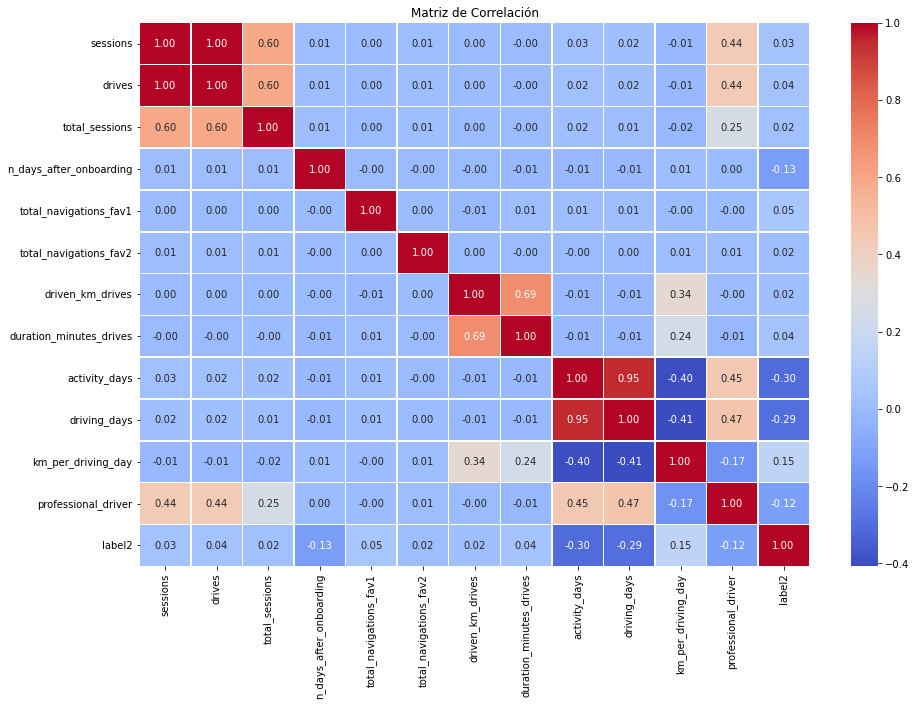

In [50]:
# Plot correlation heatmap
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Matriz de Correlación")
plt.show()

If there are predictor variables that have a Pearson correlation coefficient value greater than the **absolute value of 0.7**, these variables are strongly multicollinear. Therefore, only one of these variables should be used in your model.

**Note:** 0.7 is an arbitrary threshold. Some industries may use 0.6, 0.8, etc.

**Question:** Which variables are multicollinear with each other?

### 📌 **Variables con multicolinealidad en la matriz de correlación**  

La **multicolinealidad** ocurre cuando dos o más variables tienen una correlación alta (**mayor a 0.8 o 0.9**), lo que puede afectar el rendimiento de un modelo de regresión logística al generar coeficientes inestables y dificultades en la interpretación.  

---

### 🔍 **Variables altamente correlacionadas en la matriz**  

#### ✅ **1. `sessions` y `drives` → Correlación = 1.00**  
📌 **Interpretación:**  
- Ambas variables son prácticamente idénticas, lo que indica **redundancia total**.  
- **Solución recomendada:** Eliminar una de las dos (`sessions` o `drives`).  

#### ✅ **2. `activity_days` y `driving_days` → Correlación = 0.95**  
📌 **Interpretación:**  
- Los días activos y los días de conducción están fuertemente relacionados.  
- **Solución recomendada:** Conservar solo una (`driving_days` parece más específica).  

#### ✅ **3. `driven_km_drives` y `duration_minutes_drives` → Correlación = 0.69** (moderadamente alta)  
📌 **Interpretación:**  
- Cuantos más kilómetros conducidos, mayor duración de los viajes.  
- **Solución recomendada:** Si una de estas variables no aporta nueva información, podría eliminarse o probarse una combinación (`km/min`).  

#### ✅ **4. `professional_driver` con `sessions` y `drives` → Correlaciones de 0.44 y 0.44**  
📌 **Interpretación:**  
- La variable `professional_driver` se basa en `drives`, por lo que su correlación es esperada.  
- **Solución recomendada:** Se puede conservar si es relevante para el modelo, pero debe evaluarse si realmente agrega información nueva.  

---

### 🔹 **¿Qué hacer con la multicolinealidad?**  

1️⃣ **Eliminar una de las variables altamente correlacionadas**  
   - Si dos variables son **casi idénticas (`corr = 1.00`)**, una debe eliminarse.  
   - Ejemplo: `sessions` y `drives` → conservar solo una.  

2️⃣ **Usar técnicas de reducción de dimensionalidad**  
   - **PCA (Análisis de Componentes Principales)** para combinar variables correlacionadas en una sola.  

3️⃣ **Calcular el VIF (Factor de Inflación de la Varianza)**  
   - Para identificar cuáles variables afectan más la estabilidad del modelo.  

```python
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Seleccionar variables numéricas
X = df[["sessions", "drives", "total_sessions", "activity_days", "driving_days"]]

# Calcular el VIF para cada variable
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif)
```

📊 **Si una variable tiene VIF > 5 o 10, debe considerarse eliminar o combinar con otra.**  

---

### ✅ **Conclusión**  

1. **Eliminar una de las siguientes parejas de variables:**  
   - `sessions` o `drives` (**son idénticas, eliminar una**).  
   - `activity_days` o `driving_days` (**correlación muy alta, eliminar una**).  
   
2. **Evaluar si `driven_km_drives` y `duration_minutes_drives` pueden combinarse**.  

3. **Verificar VIF para tomar mejores decisiones sobre qué variables eliminar.**  

### **Task 3c. Create dummies (if necessary)**

If you have selected `device` as an X variable, you will need to create dummy variables since this variable is categorical.

In cases with many categorical variables, you can use pandas built-in [`pd.get_dummies()`](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html), or you can use scikit-learn's [`OneHotEncoder()`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) function.

**Note:** Variables with many categories should only be dummied if absolutely necessary. Each category will result in a coefficient for your model which can lead to overfitting.

Because this dataset only has one remaining categorical feature (`device`), it's not necessary to use one of these special functions. You can just implement the transformation directly.

Create a new, binary column called `device2` that encodes user devices as follows:

* `Android` -> `0`
* `iPhone` -> `1`

In [28]:
# Create new `device2` variable
df["device2"] = np.where(df["device"] == "iPhone", 1, 0)
df.head()

,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device,km_per_driving_day,professional_driver,label2,device2
0,retained,243.0,200.0,296.748273,2276,208.0,0.0,2628.845068,1985.775061,28,19,Android,138.360267,1,0,0
1,retained,133.0,107.0,326.896596,1225,19.0,64.0,8898.716275,3160.472914,13,11,iPhone,1246.901868,0,0,1
2,retained,114.0,95.0,135.522926,2651,0.0,0.0,3059.148818,1610.735904,14,8,Android,382.393602,0,0,0
3,retained,49.0,40.0,67.589221,15,322.0,7.0,913.591123,587.196542,7,3,iPhone,304.530374,0,0,1
4,retained,84.0,68.0,168.247020,1562,166.0,5.0,3950.202008,1219.555924,27,18,Android,219.455667,1,0,0


### **Task 3d. Model building**

#### **Assign predictor variables and target**

To build your model you need to determine what X variables you want to include in your model to predict your target&mdash;`label2`.

Drop the following variables and assign the results to `X`:

* `label` (this is the target)
* `label2` (this is the target)
* `device` (this is the non-binary-encoded categorical variable)
* `sessions` (this had high multicollinearity)
* `driving_days` (this had high multicollinearity)

**Note:** Notice that `sessions` and `driving_days` were selected to be dropped, rather than `drives` and `activity_days`. The reason for this is that the features that were kept for modeling had slightly stronger correlations with the target variable than the features that were dropped.

In [51]:
# Isolate predictor variables
X = df.drop(columns = ['label', 'label2', 'device', 'sessions', 'driving_days'])

Now, isolate the dependent (target) variable. Assign it to a variable called `y`.

In [52]:
# Isolate target variable
y = df["label2"]

#### **Split the data**

Use scikit-learn's [`train_test_split()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function to perform a train/test split on your data using the X and y variables you assigned above.

**Note 1:** It is important to do a train test to obtain accurate predictions.  You always want to fit your model on your training set and evaluate your model on your test set to avoid data leakage.

**Note 2:** Because the target class is imbalanced (82% retained vs. 18% churned), you want to make sure that you don't get an unlucky split that over- or under-represents the frequency of the minority class. Set the function's `stratify` parameter to `y` to ensure that the minority class appears in both train and test sets in the same proportion that it does in the overall dataset.

In [53]:
# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [54]:
# Use .head()
X_train.head()

,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,km_per_driving_day,professional_driver,device2
1192,200.0,455.439492,504,0.0,113.0,2707.906201,1090.476086,30,100.292822,1,1
7593,137.0,282.858310,3382,0.0,124.0,7113.176056,2005.715481,1,0.000000,0,1
4440,2.0,73.077779,2133,88.0,13.0,4089.069058,2737.176219,30,170.377877,0,1
11357,123.0,325.427459,3017,167.0,7.0,1457.283362,451.848000,13,132.480306,0,0
772,39.0,455.439492,78,126.0,51.0,4772.509343,2837.036812,28,238.625467,0,1


Use scikit-learn to instantiate a logistic regression model. Add the argument `penalty = None`.

It is important to add `penalty = None` since your predictors are unscaled.

Refer to scikit-learn's [logistic regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) documentation for more information.

Fit the model on `X_train` and `y_train`.

In [58]:
model = LogisticRegression(penalty='none', max_iter=400)

model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=400,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Call the `.coef_` attribute on the model to get the coefficients of each variable.  The coefficients are in order of how the variables are listed in the dataset.  Remember that the coefficients represent the change in the **log odds** of the target variable for **every one unit increase in X**.

If you want, create a series whose index is the column names and whose values are the coefficients in `model.coef_`.

In [59]:
pd.Series(model.coef_[0], index=X.columns)

drives                     0.001710
total_sessions             0.000383
n_days_after_onboarding   -0.000403
total_navigations_fav1     0.001305
total_navigations_fav2     0.000647
driven_km_drives          -0.000021
duration_minutes_drives    0.000106
activity_days             -0.104180
km_per_driving_day         0.000031
professional_driver       -0.001515
device2                   -0.001020
dtype: float64

Call the model's `intercept_` attribute to get the intercept of the model.

In [60]:
model.intercept_

array([-0.00169267])

#### **Check final assumption**

Verify the linear relationship between X and the estimated log odds (known as logits) by making a regplot.

Call the model's `predict_proba()` method to generate the probability of response for each sample in the training data. (The training data is the argument to the method.) Assign the result to a variable called `training_probabilities`. This results in a 2-D array where each row represents a user in `X_train`. The first column is the probability of the user not churning, and the second column is the probability of the user churning.

In [63]:
# Get the predicted probabilities of the training data

p = model.predict_proba(X_train)
p

array([[0.93600623, 0.06399377],
       [0.7284091 , 0.2715909 ],
       [0.9740551 , 0.0259449 ],
       ...,
       [0.92006355, 0.07993645],
       [0.85344321, 0.14655679],
       [0.93772948, 0.06227052]])

In logistic regression, the relationship between a predictor variable and the dependent variable does not need to be linear, however, the log-odds (a.k.a., logit) of the dependent variable with respect to the predictor variable should be linear. Here is the formula for calculating log-odds, where _p_ is the probability of response:
<br>
$$
logit(p) = ln(\frac{p}{1-p})
$$
<br>

1. Create a dataframe called `logit_data` that is a copy of `df`.

2. Create a new column called `logit` in the `logit_data` dataframe. The data in this column should represent the logit for each user.


In [66]:
# 1. Copy the `X_train` dataframe and assign to `logit_data`
logit_data = X_train.copy()

# 2. Create a new `logit` column in the `logit_data` df
logit_data['logit'] = [np.log(prob[1] / prob[0]) for prob in p]

Plot a regplot where the x-axis represents an independent variable and the y-axis represents the log-odds of the predicted probabilities.

In an exhaustive analysis, this would be plotted for each continuous or discrete predictor variable. Here we show only `driving_days`.

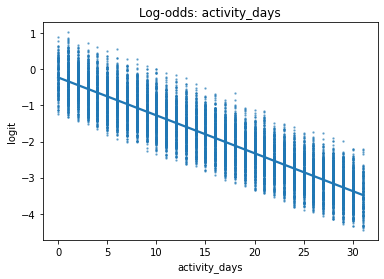

In [67]:
# Plot regplot of `activity_days` log-odds
sns.regplot(x='activity_days', y='logit', data=logit_data, scatter_kws={'s': 2, 'alpha': 0.5})
plt.title('Log-odds: activity_days');

<img src="images/Execute.png" width="100" height="100" align=left>

## **PACE: Execute**

Consider the questions in your PACE Strategy Document to reflect on the Execute stage.

### **Task 4a. Results and evaluation**

If the logistic assumptions are met, the model results can be appropriately interpreted.

Use the code block below to make predictions on the test data.


In [72]:
# Generate predictions on X_test
y_pred = model.predict(X_test)

Now, use the `score()` method on the model with `X_test` and `y_test` as its two arguments. The default score in scikit-learn is **accuracy**.  What is the accuracy of your model?

*Consider:  Is accuracy the best metric to use to evaluate this model?*

In [73]:
# Score the model (accuracy) on the test data
print("Accuracy:", "%.6f" % metrics.accuracy_score(y_test, y_pred))
model.score(X_test, y_test)

Accuracy: 0.825874


0.8258741258741259

### **Task 4b. Show results with a confusion matrix**

Use the `confusion_matrix` function to obtain a confusion matrix. Use `y_test` and `y_preds` as arguments.

In [76]:
cm = metrics.confusion_matrix(y_test, y_pred, labels = model.classes_)



Next, use the `ConfusionMatrixDisplay()` function to display the confusion matrix from the above cell, passing the confusion matrix you just created as its argument.

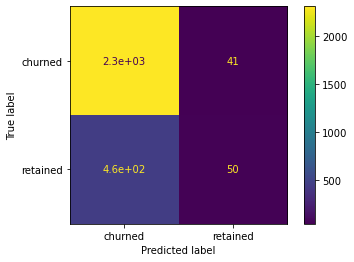

In [77]:
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = clf.classes_)
disp.plot()

You can use the confusion matrix to compute precision and recall manually. You can also use scikit-learn's [`classification_report()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) function to generate a table from `y_test` and `y_preds`.

In [82]:
# Calculate precision manually
print("Precision:", "%.6f" % metrics.precision_score(y_test, y_pred))

precision = cm[1,1] / (cm[0, 1] + cm[1, 1])
precision

Precision: 0.549451


0.5494505494505495

In [81]:
# Calculate recall manually
print("Recall:", "%.6f" % metrics.recall_score(y_test, y_pred))
recall = cm[1,1] / (cm[1, 0] + cm[1, 1])
recall


Recall: 0.098619


0.09861932938856016

In [83]:
# Create a classification report
target_labels = ['retained', 'churned']
print(classification_report(y_test, y_preds, target_names=target_labels))

              precision    recall  f1-score   support

    retained       0.83      0.98      0.90      2353
     churned       0.55      0.10      0.17       507

    accuracy                           0.83      2860
   macro avg       0.69      0.54      0.53      2860
weighted avg       0.78      0.83      0.77      2860



**Note:** The model has decent precision but very low recall, which means that it makes a lot of false negative predictions and fails to capture users who will churn.

### **BONUS**

Generate a bar graph of the model's coefficients for a visual representation of the importance of the model's features.

In [84]:
# Create a list of (column_name, coefficient) tuples
feature_importance = list(zip(X_train.columns, model.coef_[0]))

# Sort the list by coefficient value
feature_importance = sorted(feature_importance, key=lambda x: x[1], reverse=True)
feature_importance

[('drives', 0.0017099772490211263),
 ('total_navigations_fav1', 0.0013045149926154606),
 ('total_navigations_fav2', 0.0006467699587410557),
 ('total_sessions', 0.00038252145470909224),
 ('duration_minutes_drives', 0.00010573518273766947),
 ('km_per_driving_day', 3.082549621521852e-05),
 ('driven_km_drives', -2.137652011587023e-05),
 ('n_days_after_onboarding', -0.0004028264544540557),
 ('device2', -0.001020093210956004),
 ('professional_driver', -0.0015146491398974737),
 ('activity_days', -0.10417959953128188)]

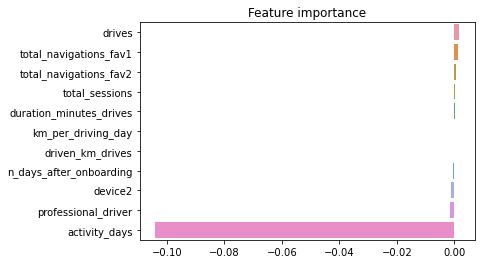

In [85]:
# Plot the feature importances
sns.barplot(x=[x[1] for x in feature_importance],
            y=[x[0] for x in feature_importance],
            orient='h')
plt.title('Feature importance');

### **Task 4c. Conclusion**

Now that you've built your regression model, the next step is to share your findings with the Waze leadership team. Consider the following questions as you prepare to write your executive summary. Think about key points you may want to share with the team, and what information is most relevant to the user churn project.

**Questions:**

1. What variable most influenced the model's prediction? How? Was this surprising?

activity_days es la que más influyó ya que su coef es de -0.1... esto se debe tener en cuenta para la proyección del churn

2. Were there any variables that you expected to be stronger predictors than they were?

Aunque en la matriz de correlación la que más se correlacionava era activity days, tamién esperaba que driving_days se correlacionara mucho mejor, pero se eliminó ya que el activity days tiene una fuerte correlación con activity_days. Tal vez la siguiente en correlación, que es km_per_day con 0.15, pero resulto ser más baja que las demás.

3. Why might a variable you thought to be important not be important in the model?

📌 Razones por las que una variable importante podría no serlo en el modelo
Aunque una variable pueda parecer relevante desde una perspectiva de negocio, no siempre tiene un impacto significativo en un modelo de Regresión Logística. Aquí algunas razones clave:

🔹 1. Multicolinealidad con otras variables
📌 ¿Qué ocurre?

Si una variable está altamente correlacionada con otra (multicolinealidad), su efecto en la predicción puede ser absorbido por la otra variable.
Esto hace que su coeficiente sea insignificante o inestable.
✅ Solución

Calcular el VIF (Factor de Inflación de la Varianza) para detectar multicolinealidad.
Eliminar una de las variables redundantes.

🔹 2. Relación no lineal con la variable objetivo
📌 ¿Qué ocurre?

La Regresión Logística asume una relación lineal entre las variables predictoras (X) y los logits (log(p/1-p)).
Si la variable tiene una relación no lineal, su coeficiente puede ser muy bajo o no significativo (p > 0.05).
✅ Solución

Transformar la variable (logaritmo, cuadrática, binning).
Usar árboles de decisión o modelos más flexibles si la relación no es lineal.

🔹 3. Bajo poder predictivo (poca variabilidad explicada)
📌 ¿Qué ocurre?

Si una variable no aporta información nueva, el modelo no la considera relevante.
Esto ocurre si la variable tiene valores casi constantes o poca variabilidad.
✅ Solución

Verificar la dispersión de la variable con un histograma o boxplot.

🔹 4. Datos insuficientes o desbalance de clases
📌 ¿Qué ocurre?

Si la variable influye en una clase minoritaria pero hay pocos datos, su efecto puede ser difícil de detectar.
✅ Solución

Balancear los datos usando SMOTE (Synthetic Minority Over-sampling Technique).



🔹 5. Variable no relevante en presencia de otras variables
📌 ¿Qué ocurre?

A veces una variable parece importante en análisis univariado, pero pierde importancia cuando se combinan otras variables en el modelo.
Esto puede deberse a interacciones entre variables o efectos combinados.
✅ Solución

Probar modelos con diferentes combinaciones de variables.
Incluir interacciones entre variables.

✅ Conclusión
Una variable puede no ser significativa en el modelo por:
1️⃣ Multicolinealidad (su información ya está explicada por otra variable).
2️⃣ Relación no lineal con la variable objetivo.
3️⃣ Bajo poder predictivo (falta de variabilidad en la variable).
4️⃣ Datos insuficientes o desbalance de clases.
5️⃣ Efecto combinado con otras variables.

📊 Siempre es recomendable hacer un análisis exploratorio antes de eliminar una variable del modelo. 🚀

4. Would you recommend that Waze use this model? Why or why not?

El modelo no es demostró ser un fuerte predictor ya que dió un bajo puntaje de recall. Tal vaz para descartar el modelo y continuar explorando otras alternativas. Para tomar decisiones comerciales importantes no es significativo.

5. What could you do to improve this model?

Tal vez sea necesario buyscar o generar otros datos o caracteristicas o variables que sean o tengan un poco más de relación con lo que se busca. Así, el modelo podría generar mejores predicciones.

6. What additional features would you like to have to help improve the model?

Tal vez se puedan incluir encuestas que den calificación a la app, con estrellas o puntos y que sea recurrente, cada semana o mes. También sería posible preguntar por la satifacción de manera categórica. TAMBIÉN SERÍA ÚTIL TENER DATOS COMO EDAD, TIPO DE EMPleo, ubicaciones geográficas que puedan dar mayor detalle del contexto en el que se mueve cada conductor, eso podría generar mayor valor a los datos y mejorar el modelo.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged. 